# Pre-processing Notebook
- Input for this notebook: SCSE faculty staff DBLP info XML as input
- Task: Select correct network representation
- Output: process and create faculty network for analysis (assuming dataflow methodology, a network should be returned

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import pickle

In [184]:
# Import faculty details into df
faculty_df = pd.read_excel('Faculty.xlsx')

# Select relevant columns
faculty_df = faculty_df[['Faculty', 'Position', 'Gender', 'Management', 'DBLP', 'Area']]

# Create dictionary
faculty_dict = faculty_df.to_dict('index')

# Declare empty List
faculty_list = []

'''
# each[1] corresponds to lumped meta data
# each[1]['Faculty'] corresonds to 'Faculty'
# each[1]['Position'] corresonds to 'Position'
# each[1]['Gender'] corresonds to 'Gender'
# each[1]['Management'] corresponds to 'Management'
# each[1]['DBLP'] corresponds to 'DBLP'
# each[1]['Area'] corresponds to 'Area'
'''
# Iterate over faculty_dict to fill up faculty_list
for each in faculty_dict.items():
    
    node_no = each[0] 
    faculty = each[1]['Faculty']
    position = each[1]['Position']
    gender = each[1]['Gender']
    management = each[1]['Management']
    dblp = each[1]['DBLP']
    area = each[1]['Area']
    
    faculty_list.append((node_no, {'Faculty': faculty}))
    faculty_list.append((node_no, {'Position': position}))
    faculty_list.append((node_no, {'Gender': gender}))
    faculty_list.append((node_no, {'Management': management}))
    faculty_list.append((node_no, {'DBLP': dblp}))
    faculty_list.append((node_no, {'Area': area}))
    
# Declare empty new graph for faculty network
faculty_graph = nx.MultiGraph()

# Fill up empty graph w/ faculty_list
faculty_graph.add_nodes_from(faculty_list)

In [3]:
file_name = "empty_faculty_graph.pkl"

open_file = open(file_name, "wb")
pickle.dump(faculty_graph, open_file)
open_file.close()

In [4]:
#list(faculty_graph.nodes)

In [5]:
# need to scrape correspondly DBL data, then augment them with existing dataset
# have to then decide how we'll be using augment faculty details to connect and generate the network

In [6]:
# Segment to use previously-extracted DBLP raw data to map collaborations between faculty staff

# Import dblp_df.csv as DF
dblp_df = pd.read_csv('dblp_df.csv')

# Create categorical class counts for each article

# Use categorical class counts to map all related faculty members with a dict

In [7]:
dblp_multi_df = dblp_df[dblp_df['key'].duplicated(keep=False)]
dblp_multi_df.sort_values(by=['key'])

,f_index,Faculty,key,Year,published_name,Other Authors,Author Contribution Index
22626,61,Sun Chengzheng,conf/3dtv/KusterRAZBSPG12,2012,Chengzheng Sun,"['Claudia Kuster', 'Nicola Ranieri', 'Agustina...",6
9576,61,Sun Chengzheng,conf/3dtv/KusterRAZBSPG12,2012,Chengzheng Sun,"['Claudia Kuster', 'Nicola Ranieri', 'Agustina...",6
9962,64,Tan Rui,conf/ACISicis/HuangSLLT17,2017,Rui Tan,"['Junjie Huang', 'Wenqian Shang', 'Weiguo Lin'...",5
23012,64,Tan Rui,conf/ACISicis/HuangSLLT17,2017,Rui Tan,"['Junjie Huang', 'Wenqian Shang', 'Weiguo Lin'...",5
24942,76,Srikanthan Thambipillai,conf/ACISicis/JigangCS09,2009,Thambipillai Srikanthan,"['Wu Jigang', 'Baofang Chang']",3
...,...,...,...,...,...,...,...
3541,17,Erik Cambria,journals/www/XuPXCZZ20,2020,Erik Cambria,"['Haotian Xu', 'Haiyun Peng', 'Haoran Xie 0001...",4
2371,13,Cong Gao,journals/www/YaoCCH12,2012,Gao Cong,"['Junjie Yao', 'Bin Cui 0001', 'Yuxin Huang']",3
15421,13,Cong Gao,journals/www/YaoCCH12,2012,Gao Cong,"['Junjie Yao', 'Bin Cui 0001', 'Yuxin Huang']",3
9359,60,Sun Aixin,journals/www/YaoS16,2016,Aixin Sun,['Yangjie Yao'],2


In [8]:
# get categorical uniques in dataframe
categorical_list = dblp_multi_df['key'].drop_duplicates().tolist()

# create list to store key:f_index_list mappins
key_findex_list = []

# use categorical uniques to return df records
for each in categorical_list:
    # extract f_index values from returned df records into a list
    mappings = dblp_multi_df[dblp_multi_df['key'] == each]['f_index'].tolist()
    # create unique pair-wise combinations for mappings (needed for networkx) 
    mappings_pair = list(combinations(mappings, 2)) 
    year = dblp_multi_df[dblp_multi_df['key'] == each]['Year'].iloc[0]
    key_findex_list.append([mappings_pair, each, year])

In [61]:
pairings = np.array(key_findex_list)[:,[0,2]]

In [74]:
distinct_paired_edges = [x for x in pairings if x[0][0][0] != x[0][0][1]]

In [101]:
distinct_paired_edges = [[list(set(x[0])), x[1]] for x in distinct_paired_edges]

In [103]:
distinct_paired_edges = [[[y, x[1]]for y in x[0]] for x in distinct_paired_edges]

In [117]:
# removing the flipped ones i.e I only want (0,16) and not (16,0)
distinct_paired_edges = [[y for y in x if y[0][0] < y[0][1]] for x in distinct_paired_edges]


In [ ]:
distinct_paired_edges = [[x[0][0], x[0][0], x[0][1]] for x in distinct_paired_edges]

In [165]:
edge_year_pairings = [[x[0][0], x[0][1], x[1]] for x in distinct_paired_edges]

In [166]:
edge_year_pairings = [tuple(x) for x in edge_year_pairings]

In [185]:
# save key_findex_list into pickle file for easy replication

file_name = "edge_year_pairings.pkl"

open_file = open(file_name, "wb")
pickle.dump(edge_year_pairings, open_file)
open_file.close()


In [186]:
# iterate over key_findex_list to populate initial network

for edge in edge_year_pairings:
    faculty_graph.add_edge(edge[0], edge[1], label = edge[2])

In [187]:
# save faculty_graph into pickle file for easy replication

file_name = "faculty_graph.pkl"

open_file = open(file_name, "wb")
pickle.dump(faculty_graph, open_file)
open_file.close()


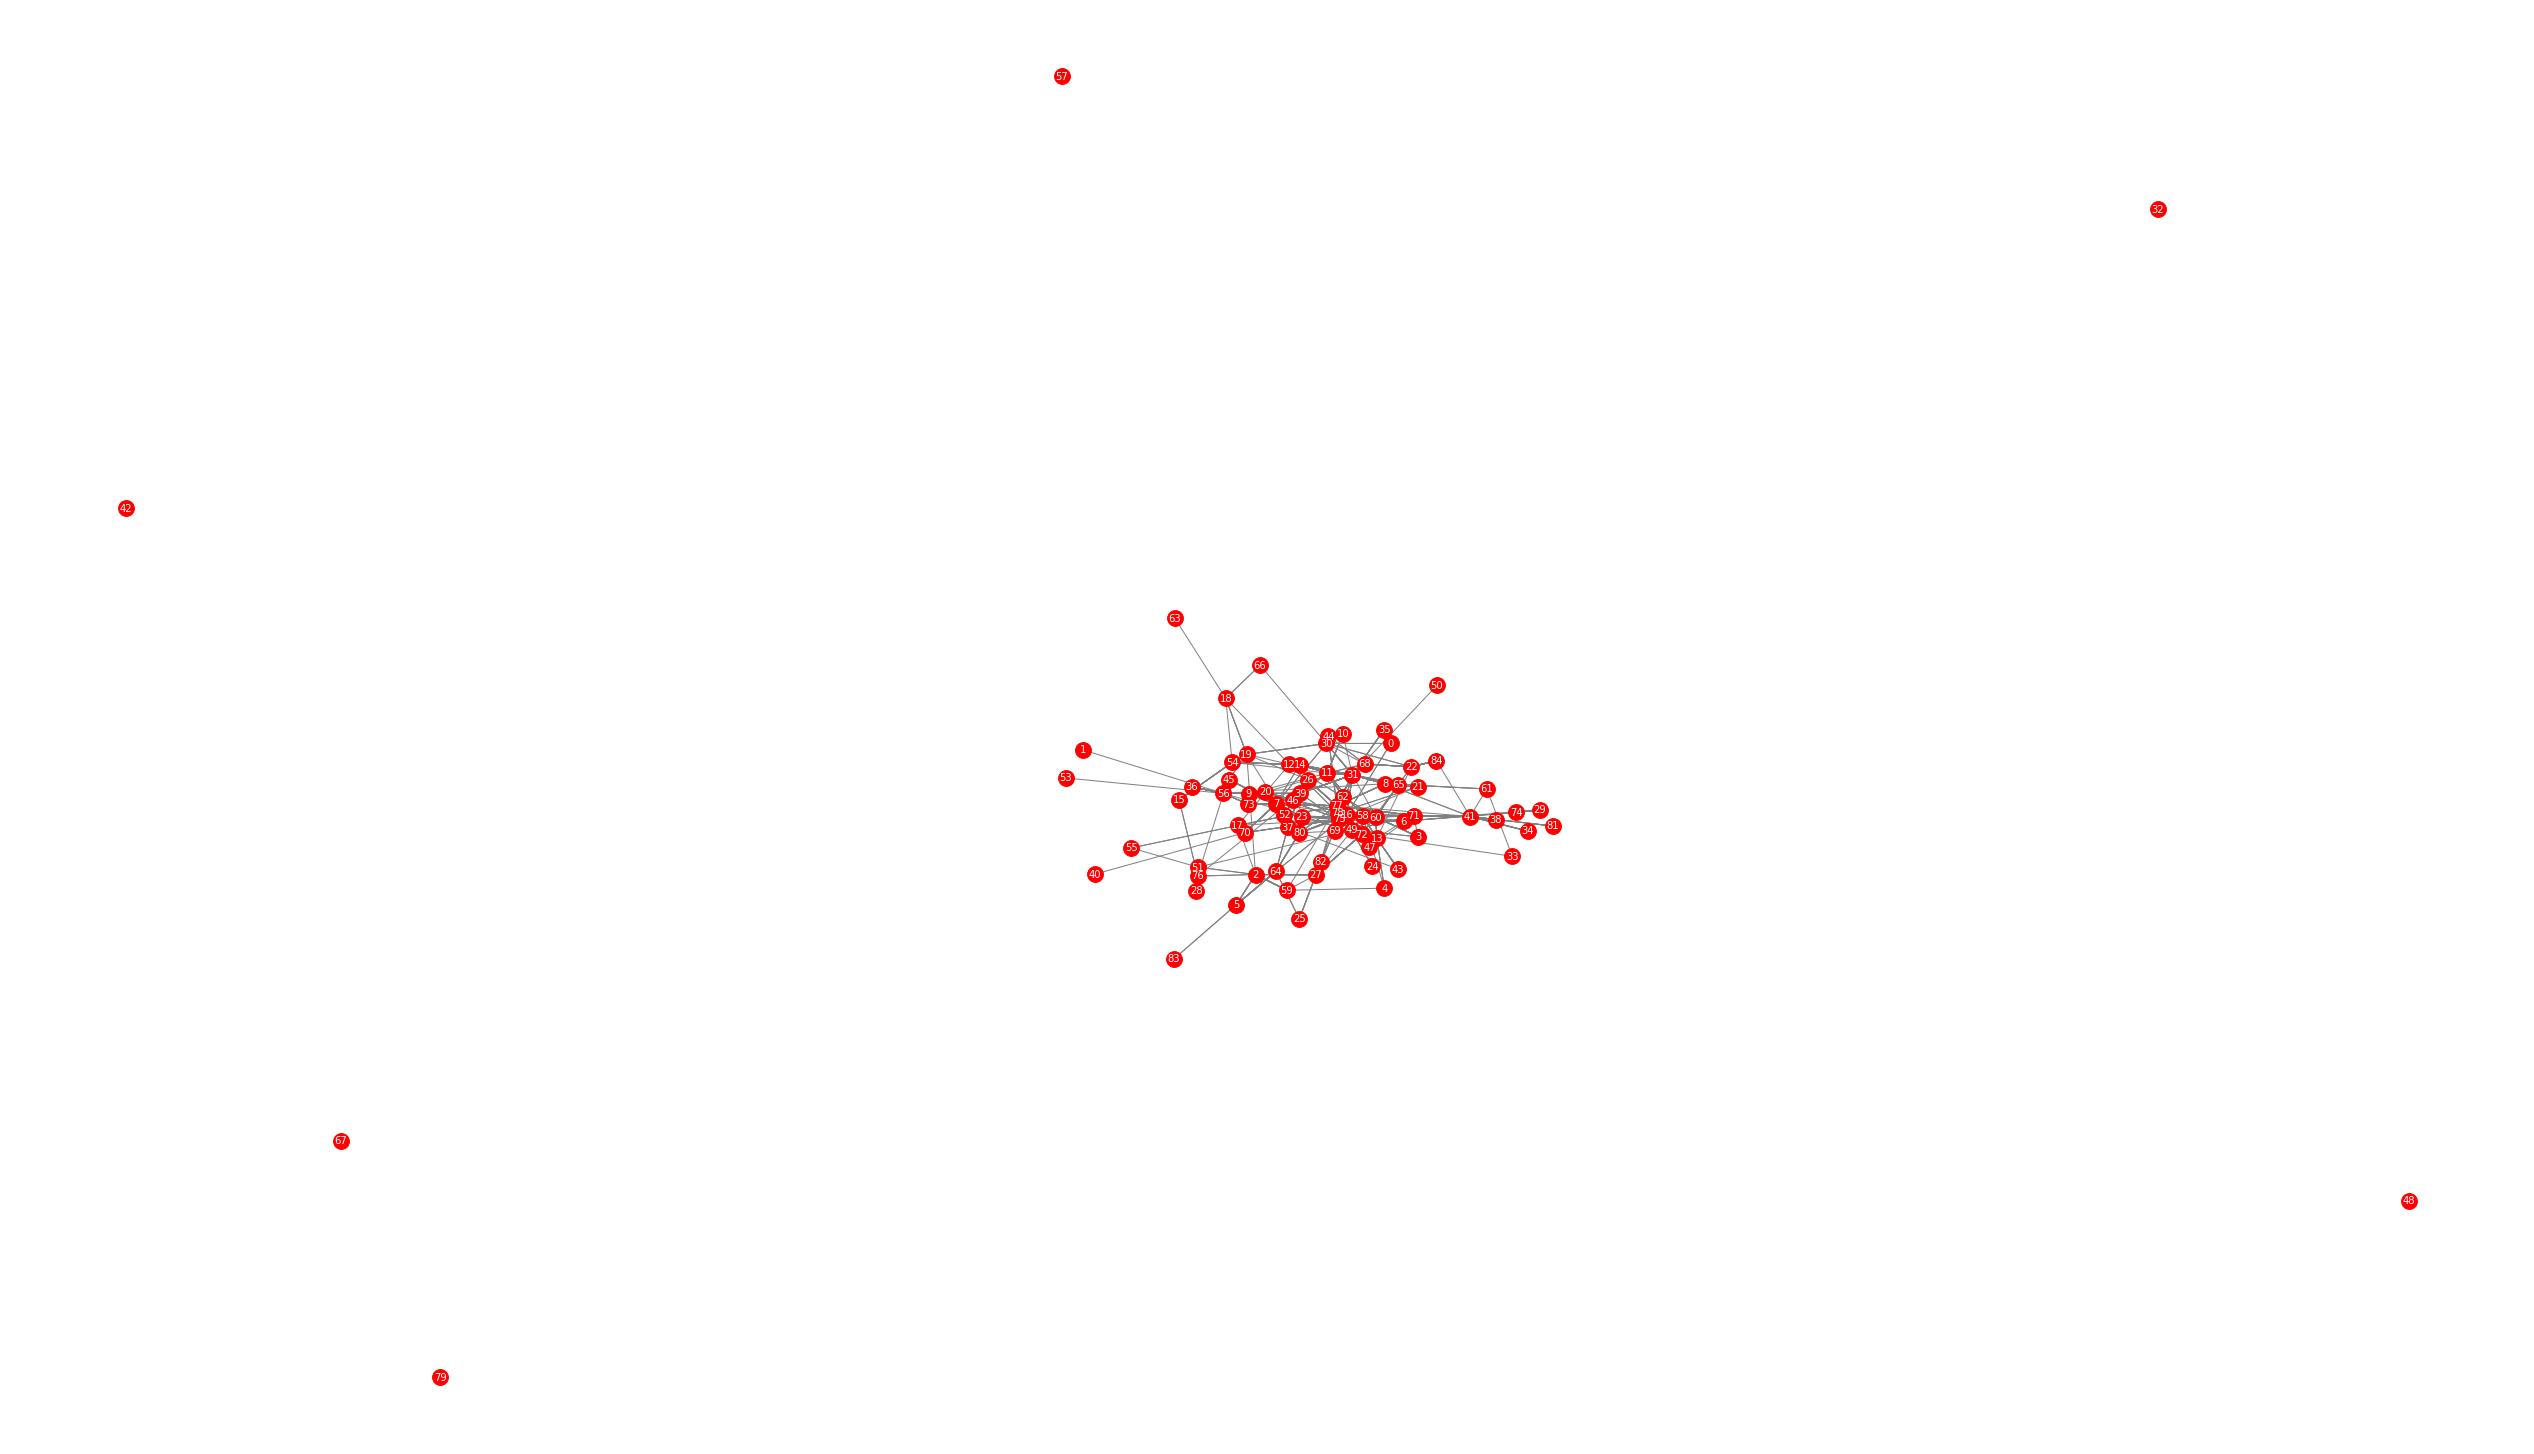

In [188]:
# Set figure for graph
plt.figure(figsize=(35, 20))

# Draw the graph
nx.draw(faculty_graph, with_labels=True, font_size=10,
        node_color='red', font_color='white', edge_color='grey', node_size=250)

# Save the graph
plt.savefig("collab_graph.png", dpi=326)

In [190]:
faculty_graph.edges()

MultiEdgeView([(0, 16, 0), (0, 16, 1), (0, 30, 0), (0, 30, 1), (1, 56, 0), (2, 19, 0), (2, 5, 0), (2, 5, 1), (2, 5, 2), (2, 5, 3), (2, 5, 4), (2, 59, 0), (2, 59, 1), (2, 59, 2), (2, 59, 3), (2, 59, 4), (2, 59, 5), (2, 59, 6), (2, 59, 7), (2, 59, 8), (2, 59, 9), (2, 27, 0), (2, 27, 1), (2, 27, 2), (2, 27, 3), (2, 27, 4), (2, 27, 5), (2, 27, 6), (2, 27, 7), (2, 17, 0), (2, 51, 0), (2, 51, 1), (2, 76, 0), (2, 76, 1), (3, 60, 0), (3, 60, 1), (3, 60, 2), (3, 60, 3), (3, 60, 4), (3, 60, 5), (3, 60, 6), (3, 60, 7), (3, 60, 8), (3, 60, 9), (3, 60, 10), (3, 71, 0), (3, 49, 0), (3, 49, 1), (4, 58, 0), (4, 13, 0), (4, 13, 1), (4, 13, 2), (4, 59, 0), (5, 64, 0), (5, 64, 1), (5, 64, 2), (5, 64, 3), (5, 64, 4), (5, 64, 5), (5, 64, 6), (5, 64, 7), (5, 64, 8), (5, 83, 0), (5, 83, 1), (6, 29, 0), (6, 74, 0), (6, 74, 1), (6, 74, 2), (6, 75, 0), (6, 75, 1), (6, 75, 2), (6, 75, 3), (6, 75, 4), (6, 75, 5), (6, 75, 6), (6, 75, 7), (6, 75, 8), (6, 75, 9), (6, 75, 10), (6, 75, 11), (6, 75, 12), (6, 75, 13), (

In [14]:
# Remove isolates
faculty_graph.remove_nodes_from(list(nx.isolates(faculty_graph)))

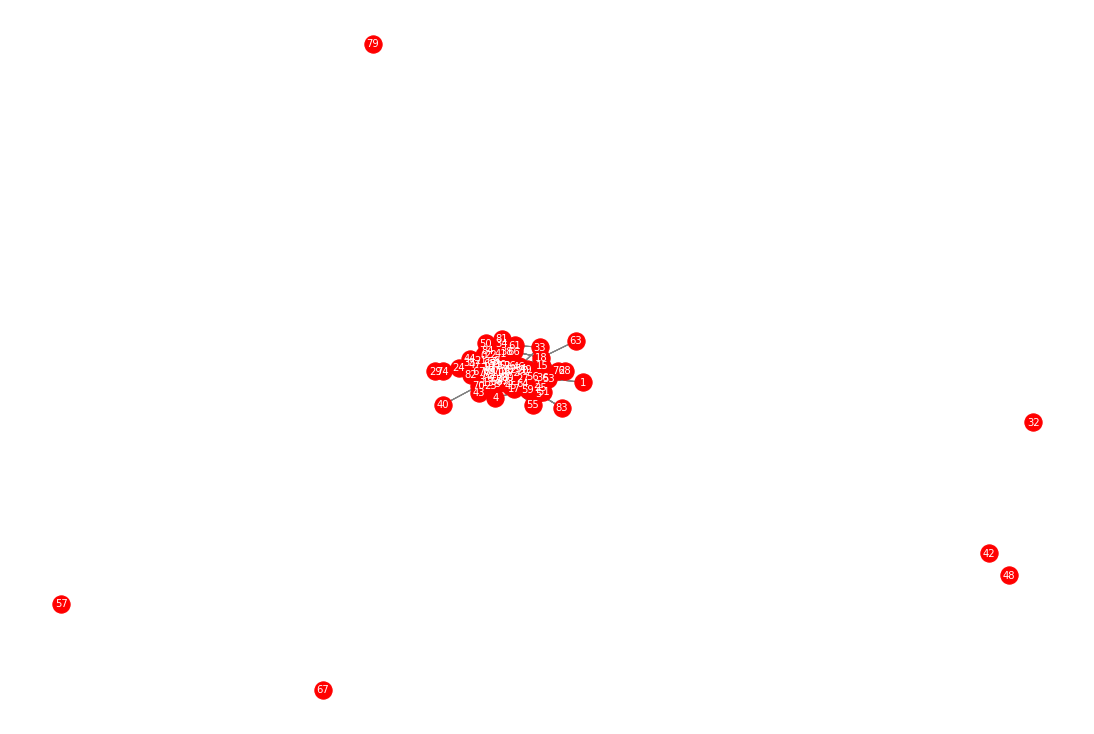

In [15]:
# Set figure for graph
plt.figure(figsize=(15, 10))

# Draw the graph (with isolates removed)
nx.draw(faculty_graph, with_labels=True, font_size=10,
        node_color='red', font_color='white', edge_color='grey', node_size=300)

# Save the graph
plt.savefig("collab_graph_connected_only.png", dpi=326)